In [1]:
import pandas
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from matplotlib import pyplot
import seaborn as sns
import numpy

In [2]:
%matplotlib inline

In [3]:
data = pandas.read_csv('../data/ondrejov-dataset.csv')
data.head()

,id,dec,gratang,detector,expval,object,dichmir,chipid,ra,specfilt,...,6718.20863309,6719.74100719,6721.27338129,6722.8057554,6724.3381295,6725.8705036,6727.4028777,6728.9352518,6730.4676259,6732.0
0,a201305230017,-11:09:40.70,30.25,PyLoN 2048x512BX,19.246130,alp Vir,2,E2V 42-10 BX,13:25:11.580,1,...,506096.210748,505286.047228,504106.925201,502043.387652,499827.958541,498385.165956,498190.044968,499302.148265,500607.698358,500899.192757
1,a201306060015,+19:10:56.60,30.25,PyLoN 2048x512BX,0.009187,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,...,193644.604516,194951.353066,200427.247481,203353.778155,203940.311357,203613.661065,202053.255088,202003.060090,203675.565714,204506.290588
2,a201306060016,+19:10:56.60,30.25,PyLoN 2048x512BX,0.012332,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,...,307559.413555,309575.702337,318283.859189,323097.056161,324141.074458,323543.630765,320970.267304,320887.844222,323502.907113,324655.685273
3,a201306060018,+33:21:45.60,30.25,PyLoN 2048x512BX,5.056532,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,...,44950.487947,45019.574545,44910.009841,44719.100229,44689.037403,44724.791337,44700.993767,44705.082297,44752.548428,44734.531766
4,a201306060019,+33:21:45.60,30.25,PyLoN 2048x512BX,15.040130,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,...,125795.778619,126004.868747,125788.287910,125227.841525,125145.712758,125330.650720,125332.395056,125338.057872,125376.976633,125252.358114


In [4]:
X_df = data.iloc[:, 12:]
X = X_df.as_matrix()[:, 20:40]

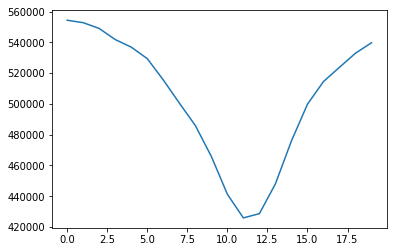

In [5]:
pyplot.plot(X[0])

In [6]:
#X_scaled = scale(X, axis=1)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X - X[:, 0:1])
X_pca.shape

(12936, 2)

In [8]:
tsne = TSNE(n_components=2, verbose=2)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12936 samples in 0.042s...
[t-SNE] Computed neighbors for 12936 samples in 1.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12936
[t-SNE] Computed conditional probabilities for sample 2000 / 12936
[t-SNE] Computed conditional probabilities for sample 3000 / 12936
[t-SNE] Computed conditional probabilities for sample 4000 / 12936
[t-SNE] Computed conditional probabilities for sample 5000 / 12936
[t-SNE] Computed conditional probabilities for sample 6000 / 12936
[t-SNE] Computed conditional probabilities for sample 7000 / 12936
[t-SNE] Computed conditional probabilities for sample 8000 / 12936
[t-SNE] Computed conditional probabilities for sample 9000 / 12936
[t-SNE] Computed conditional probabilities for sample 10000 / 12936
[t-SNE] Computed conditional probabilities for sample 11000 / 12936
[t-SNE] Computed conditional probabilities for sample 12000 / 12936
[t-SNE] Computed conditional probabilities for sam

(12936, 2)

In [9]:
data[['x', 'y']] = pandas.DataFrame(X_pca)

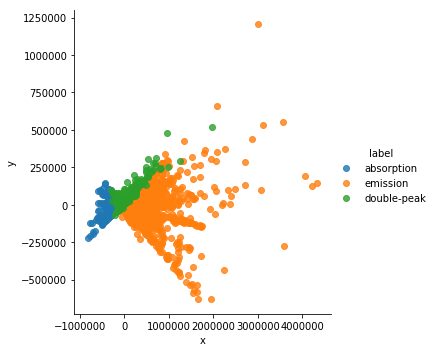

In [10]:
sns.lmplot('x', 'y', data=data, fit_reg=False, hue='label')

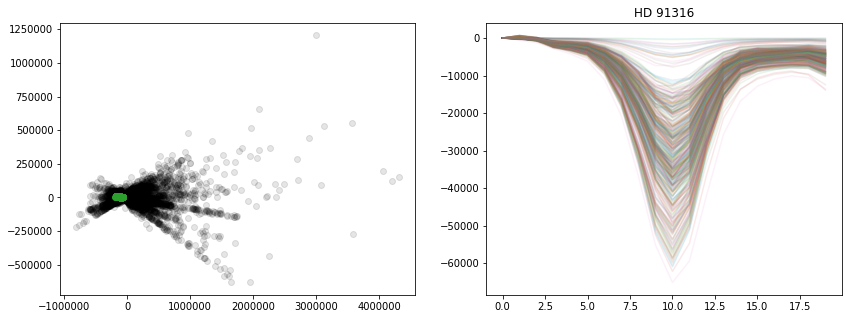

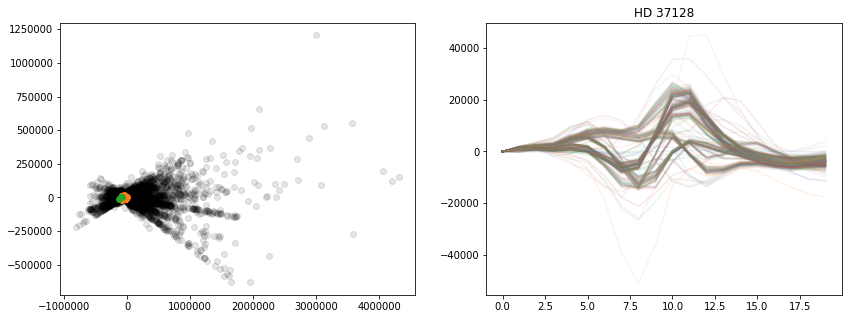

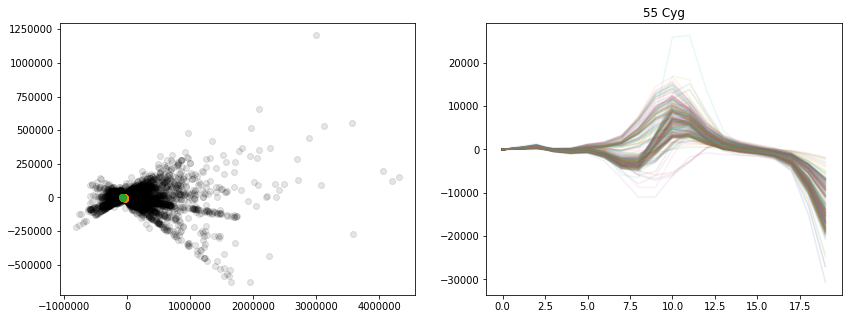

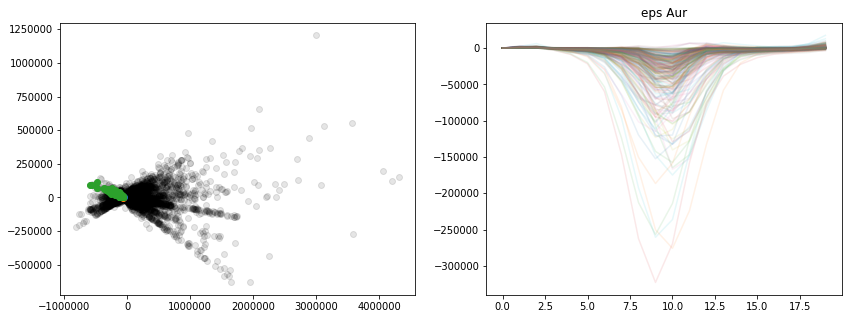

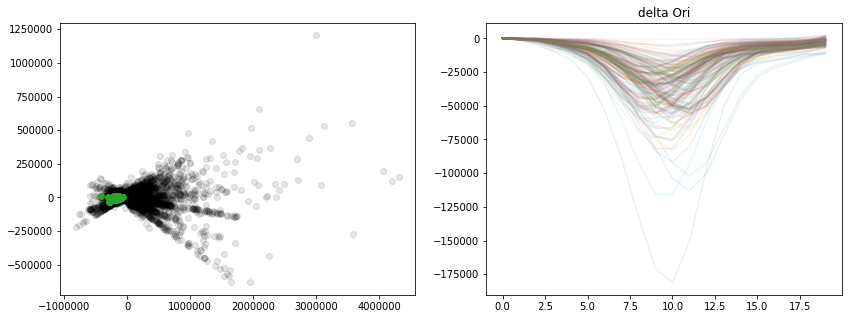

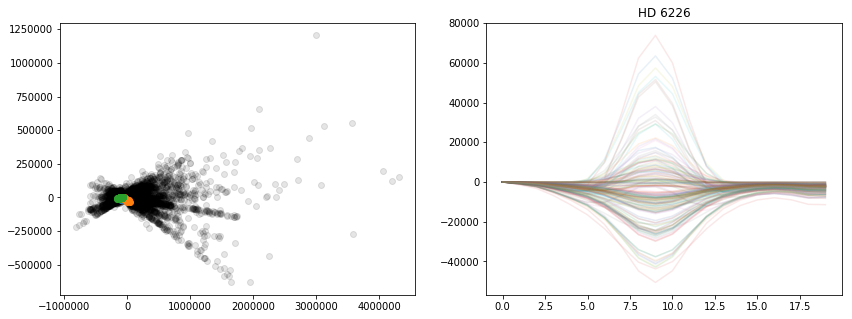

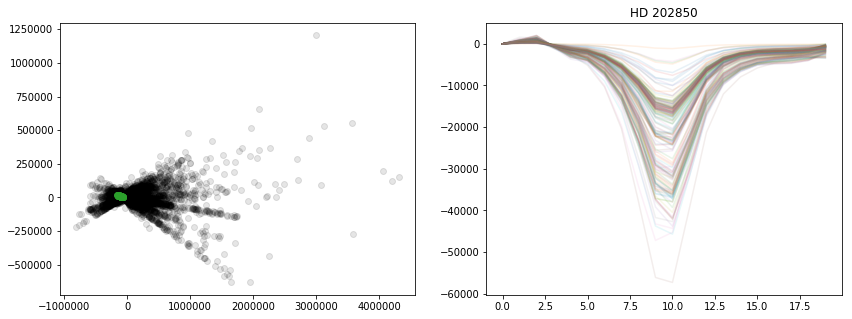

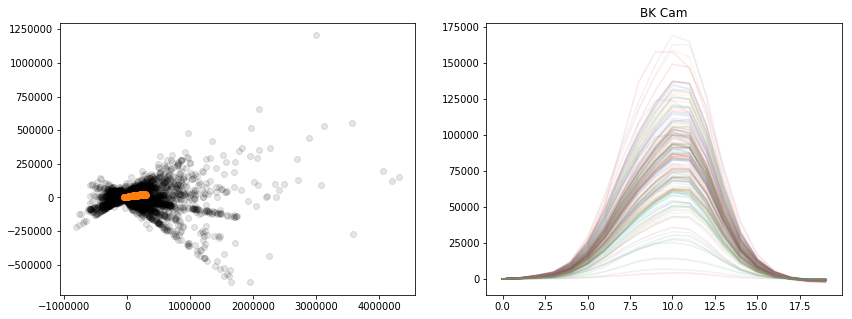

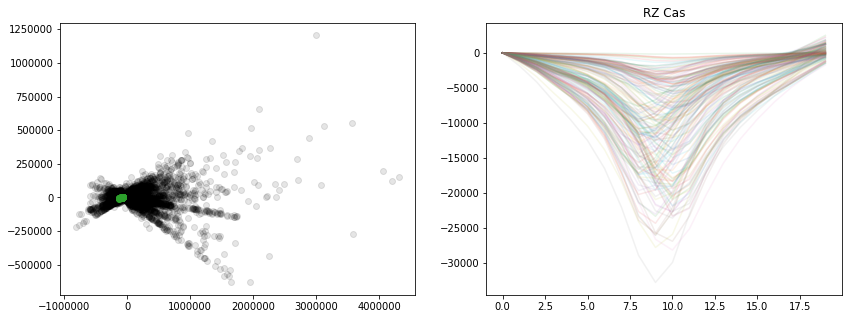

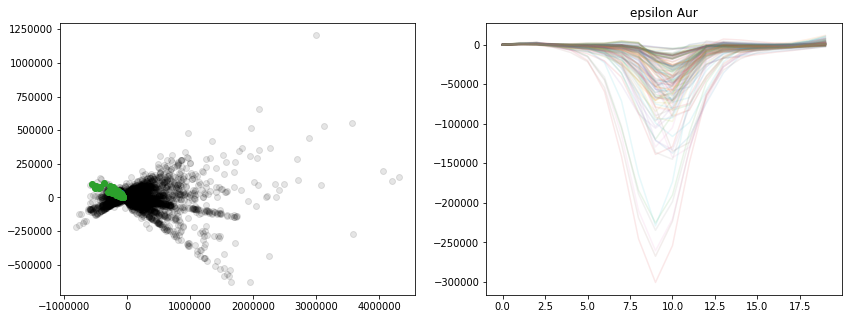

In [11]:
for name in data['object'].value_counts().index[:10]:
    x = data.loc[data['object'] == name, 'x']
    y = data.loc[data['object'] == name, 'y']
    fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize=(14, 5))
    pyplot.title(name)
    ax1.scatter(data['x'], data['y'], alpha=0.1, c='black')
    for label in ['double-peak', 'emission', 'absorption']:
        index = data.loc[data['object'] == name, 'label'] == label
        ax1.scatter(x[index], y[index])
    for x in data[data['object'] == name].iloc[:, 12:-2].iterrows():
        ax2.plot(x[1].values[20:40] - x[1].values[20], alpha=0.1)
    pyplot.show()